In [1]:
using Pkg
# cd("D:\\Home\\Git\\Oceananigans.jl")
# cd("C:\\Users\\Ali\\Documents\\Git\\Oceananigans.jl\\")
cd("/home/gridsan/aramadhan/Oceananigans.jl/")
Pkg.activate(".");

In [2]:
using Oceananigans

┌ Info: Recompiling stale cache file /home/gridsan/aramadhan/.julia/compiled/v1.1/Oceananigans/VuIZ2.ji for Oceananigans [6e00b360-fae3-11e8-3922-3d7cb9e50aad]
└ @ Base loading.jl:1184


In [3]:
# using Pkg; Pkg.test("Oceananigans")

In [4]:
include("examples/deep_convection_3d_gpu.jl")

deep_convection_3d_gpu (generic function with 1 method)

In [5]:
deep_convection_3d_gpu()

[FieldWriter] Writing T to disk: ./deep_convection_3d_T_000000000000.dat
Threads per block: (16, 16)
Blocks in grid:    (8, 8, 64)
Poisson:1.292 s
model.clock.time = 20 / 30000   56.129 s
Poisson:60.586 ms
model.clock.time = 40 / 30000   60.860 ms
Poisson:64.039 ms
model.clock.time = 60 / 30000   64.404 ms
Poisson:67.108 ms
model.clock.time = 80 / 30000   67.351 ms
Poisson:59.600 ms
model.clock.time = 100 / 30000   59.937 ms
Poisson:60.017 ms
model.clock.time = 120 / 30000   60.259 ms
Poisson:62.770 ms
model.clock.time = 140 / 30000   63.136 ms
Poisson:59.141 ms
model.clock.time = 160 / 30000   59.376 ms
Poisson:58.685 ms
model.clock.time = 180 / 30000   59.026 ms
Poisson:60.629 ms
model.clock.time = 200 / 30000   60.866 ms
Poisson:59.266 ms
model.clock.time = 220 / 30000   59.628 ms
Poisson:59.613 ms
model.clock.time = 240 / 30000   59.855 ms
Poisson:60.844 ms
model.clock.time = 260 / 30000   61.206 ms
Poisson:59.156 ms
model.clock.time = 280 / 30000   59.390 ms
Poisson:58.980 ms
mode

In [6]:
fio = open("./deep_convection_3d_T_000000030000.dat", "r")
arr = zeros(Float32, 128, 128, 64)
read!(fio, arr);

In [7]:
import PyPlot

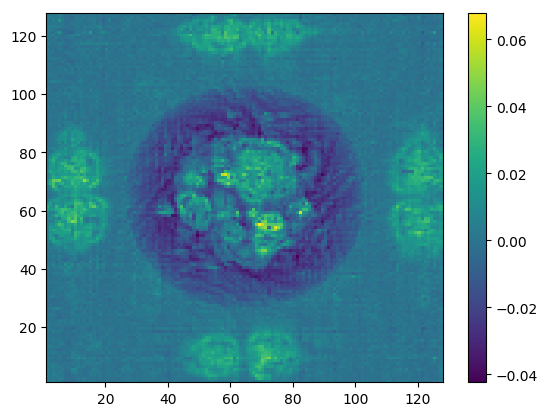

PyObject <matplotlib.colorbar.Colorbar object at 0x7f46e01f4fd0>

In [8]:
PyPlot.pcolormesh(1:128, 1:128, arr[:, :, 1] .- 293.15)
PyPlot.colorbar()

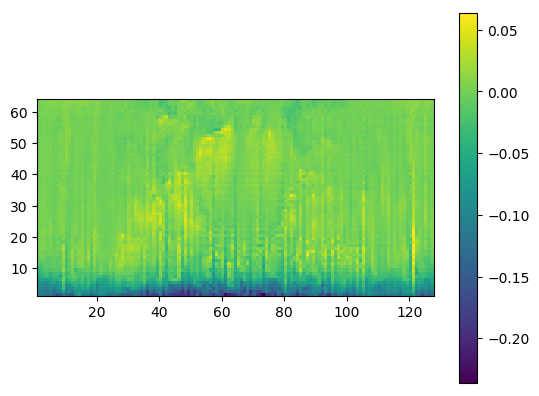

In [9]:
PyPlot.pcolormesh(1:128, 1:64, rotl90(arr[64, :, :]) .- 293.15)
PyPlot.colorbar()
PyPlot.axes()[:set_aspect]("equal")